**Roman Schiffino**

Spring 2024

CS 251 / 252: Data Analysis and Visualization

Project 4: Principal Component Analysis

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import pca

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Task 3: Analyzing the results of PCA

In this task, you will apply PCA to the Iris dataset and analyze properties of the PCA representation.

### 3a. Import Iris data

In the cell below:
- load in the Iris dataset into a pandas DataFrame.
- select all numeric headers (i.e. drop `species`).
- Print out the head (only showing the first 5 data samples).

You should see (with better formatting):

```
	sepal_length	sepal_width	petal_length	petal_width
0	5.1	3.5	1.4	0.2
1	4.9	3.0	1.4	0.2
2	4.7	3.2	1.3	0.2
3	4.6	3.1	1.5	0.2
4	5.0	3.6	1.4	0.2
```

In [43]:
# Load Iris dataset
iris = pd.read_csv('data/iris.csv')

# Select all numeric headers
iris_data = iris[['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']]

# Print out the head
iris_data.head()

,sepalLength,sepalWidth,petalLength,petalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### 3b. Apply PCA to Iris

You should make the following plots:
1. Elbow plot of cumulative variance accounted for by first $k$ principal components.
2. Written description of your choice of number of PCs preserved and why.
3. Visualization (plot) of PCA projected data on 1st two PCs.

You should normalize the dataset when performing your PCA projection.

['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']


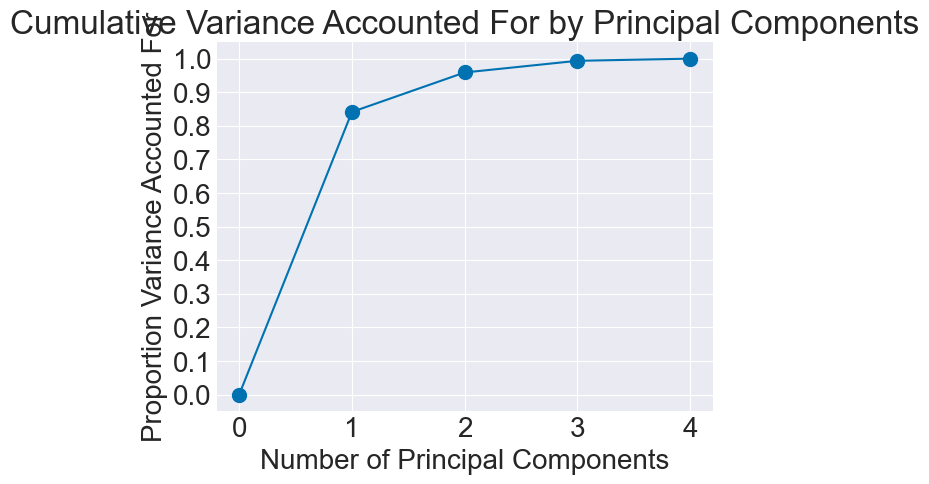

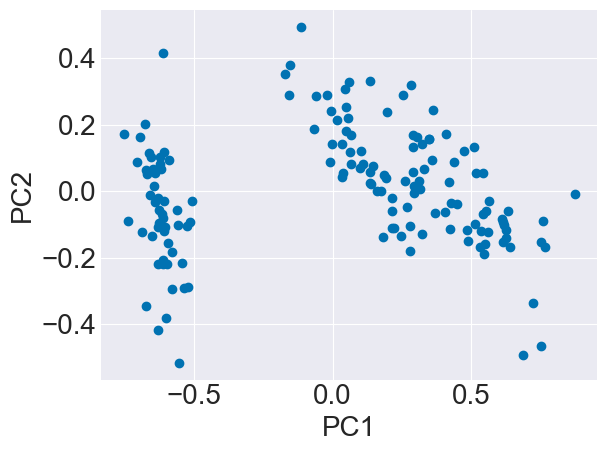

In [44]:
# Apply PCA to Iris dataset
iris_pca = pca.PCA(iris_data)
iris_pca.fit(list(iris_data.columns), normalize_dataset=True)

# Elbow plot
iris_pca.elbow_plot()
plt.show()

# Visualization of PCA projected data on 1st two PCs
num_dims = 2
pcs_to_keep = np.arange(num_dims)
iris_proj = iris_pca.pca_project(pcs_to_keep)

plt.plot(iris_proj[:, 0], iris_proj[:, 1], 'o' )
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### 3c. Dropping different pairs of principal components

In the cell below, create a "high quality" 2x2 subplots grid of scatter plots that drops different consecutive PCs from the data, then project onto the remaining PCs.

The 2x2 plots should keep:
- (top-left) PCs [3, 4]
- (top-right) PCs [2, 3]
- (bottom-left) PCs [4, 1]
- (bottom-right) PCs [1, 2]

High quality means
- x and y axis label indicating the PC (e.g. PC1)
- title indicating the PCs shown in the plot

You may have to adjust the font/figure sizes to make things legible.

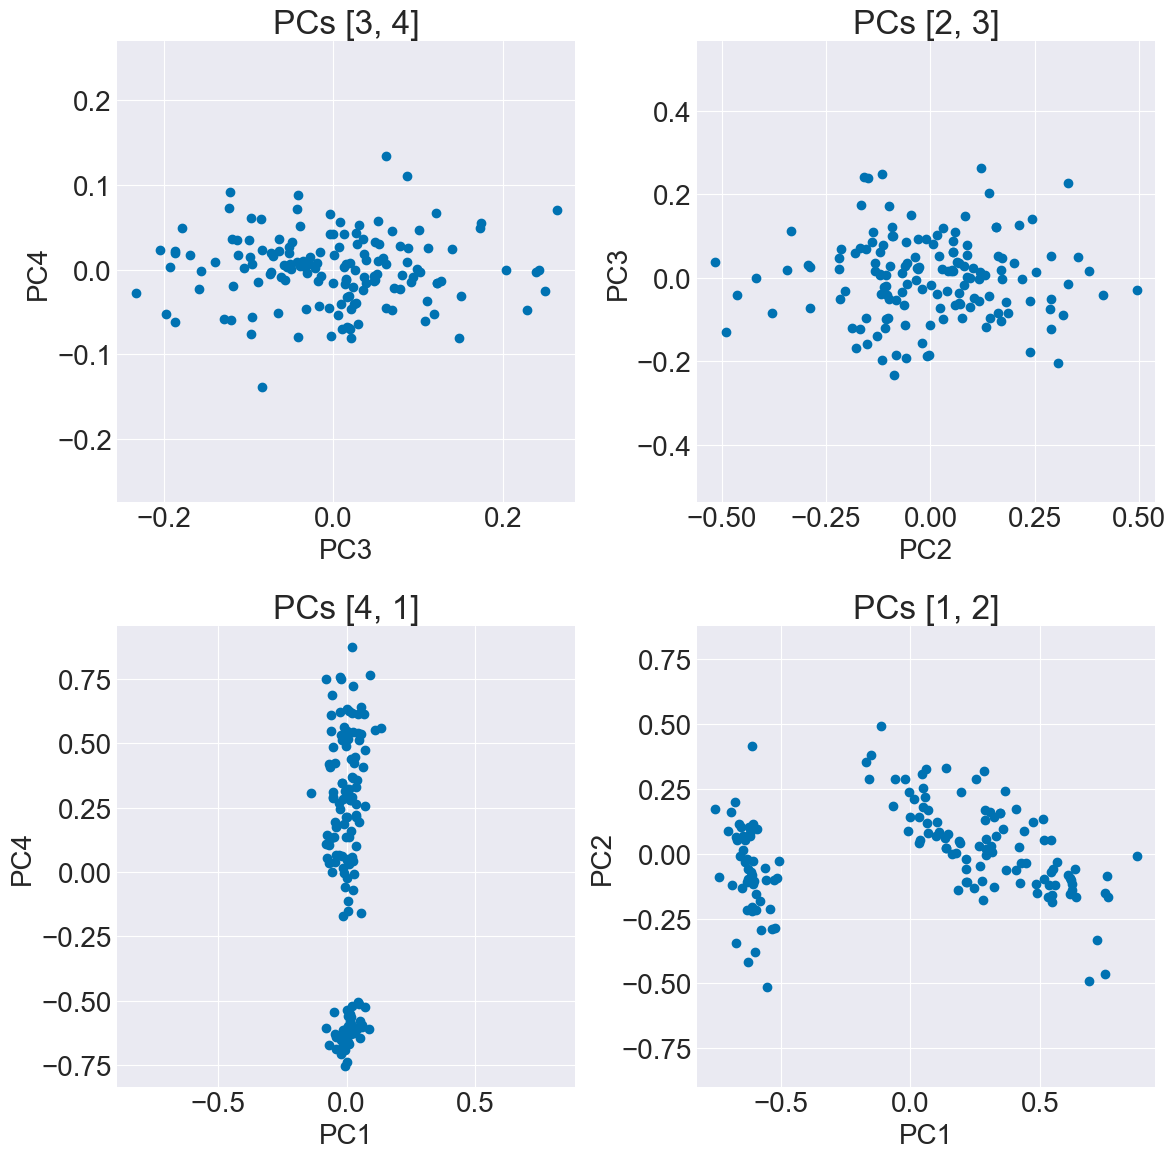

In [45]:
# Create a 2x2 grid of scatter plots
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# PCs [3, 4]
pcs_to_keep = [2, 3]
iris_proj1 = iris_pca.pca_project(pcs_to_keep)
axs[0, 0].plot(iris_proj1[:, 0], iris_proj1[:, 1], 'o')
axs[0, 0].set_xlabel('PC3')
axs[0, 0].set_ylabel('PC4')
axs[0, 0].set_title('PCs [3, 4]')
axs[0, 0].axis('equal')

# PCs [2, 3]
pcs_to_keep = [1, 2]
iris_proj2 = iris_pca.pca_project(pcs_to_keep)
axs[0, 1].plot(iris_proj2[:, 0], iris_proj2[:, 1], 'o')
axs[0, 1].set_xlabel('PC2')
axs[0, 1].set_ylabel('PC3')
axs[0, 1].set_title('PCs [2, 3]')
axs[0, 1].axis('equal')

# PCs [4, 1]
pcs_to_keep = [3, 0]
iris_proj3 = iris_pca.pca_project(pcs_to_keep)
axs[1, 0].plot(iris_proj3[:, 0], iris_proj3[:, 1], 'o')
axs[1, 0].set_xlabel('PC1')
axs[1, 0].set_ylabel('PC4')
axs[1, 0].set_title('PCs [4, 1]')
axs[1, 0].axis('equal')

# PCs [1, 2]
pcs_to_keep = [0, 1]
iris_proj4 = iris_pca.pca_project(pcs_to_keep)
axs[1, 1].plot(iris_proj4[:, 0], iris_proj4[:, 1], 'o')
axs[1, 1].set_xlabel('PC1')
axs[1, 1].set_ylabel('PC2')
axs[1, 1].set_title('PCs [1, 2]')
axs[1, 1].axis('equal')

plt.tight_layout()
plt.show()


### 3d. Questions

**Question 8:** Interpret what the 2x2 grid of plots tells us about keeping different PCs.

**Answer 8:** 
Per plot interpretation:

1. **PC1 vs. PC2 (bottom right)**:
   - The spread of points along both axes, although greater along PC1, suggests that PC1 and PC2 capture a good amount of the variability in the data.
   - We can also see that PC1 captures the clustering of the data as we see a clear separation of the points along the PC1 axis. 

2. **PC2 vs. PC3 (top right)**:
   - While the scale does not make this as apparent, the points are more tightly clustered in this plot than in the previous one. We see that the variability across PC3 is a bit less than that across PC2. However, it's still fairly borad capturing a decent amount of the data's variability.

3. **PC3 vs. PC4 (top left)**:
   - The points are even more tightly clustered here, again the scale makes this less apparent, but nvertheless it's tighter, especially in PC4. This indicates that PC3 and PC4 capture even less of the data's variability.
   - The variance captured by PC4 is minimal, as indicated by the tight clustering of points along the PC4 axis.

4. **PC1 vs. PC4 (bottom left)**:
   - The points are very tightly clustered along the PC4 axis and quite broad along the PC1 axis, suggesting that PC4 captures very little variance whereas PC1 captures a good amount of variance.
   - Here again, we see that PC1 captures the clustering of the data as we see a clear separation of the points along the PC1 axis. 

### General Interpretation:
- **Principal Components' Contribution**:
  - Much like expected the amount of variance captured by each principal component decreases as we move from PC1 to PC4. Suggesting that each subsequent PC captures less and less of the data's variance.

- **Dimensionality Reduction**:
  - Based on these plots, retaining the first two or three principal components might be sufficient for a good approximation of the original data.
  - Including more than three principal components (e.g., PC4) may not provide substantial additional information necessary for analysis.

### 3e. Reconstruct data based on PCs

In `pca_cov.py`, implement `pca_then_project_back`, which projects the data to PCA space, keeping only the top $k$ PCs, then projects from PCA space back onto the original data space. Then in the cell below, create a scatter plot of the two data variables `sepal_length` (x), `sepal_width` (y) of the Iris data **without any normalization**.

(<Figure size 1400x1200 with 2 Axes>,
 <Axes: title={'center': 'Sepal_Width by Sepal_Length'}, xlabel='Sepal_Width', ylabel='Sepal_Length'>,
 <Axes: xlabel='Sepal_Width', ylabel='Residuals'>)

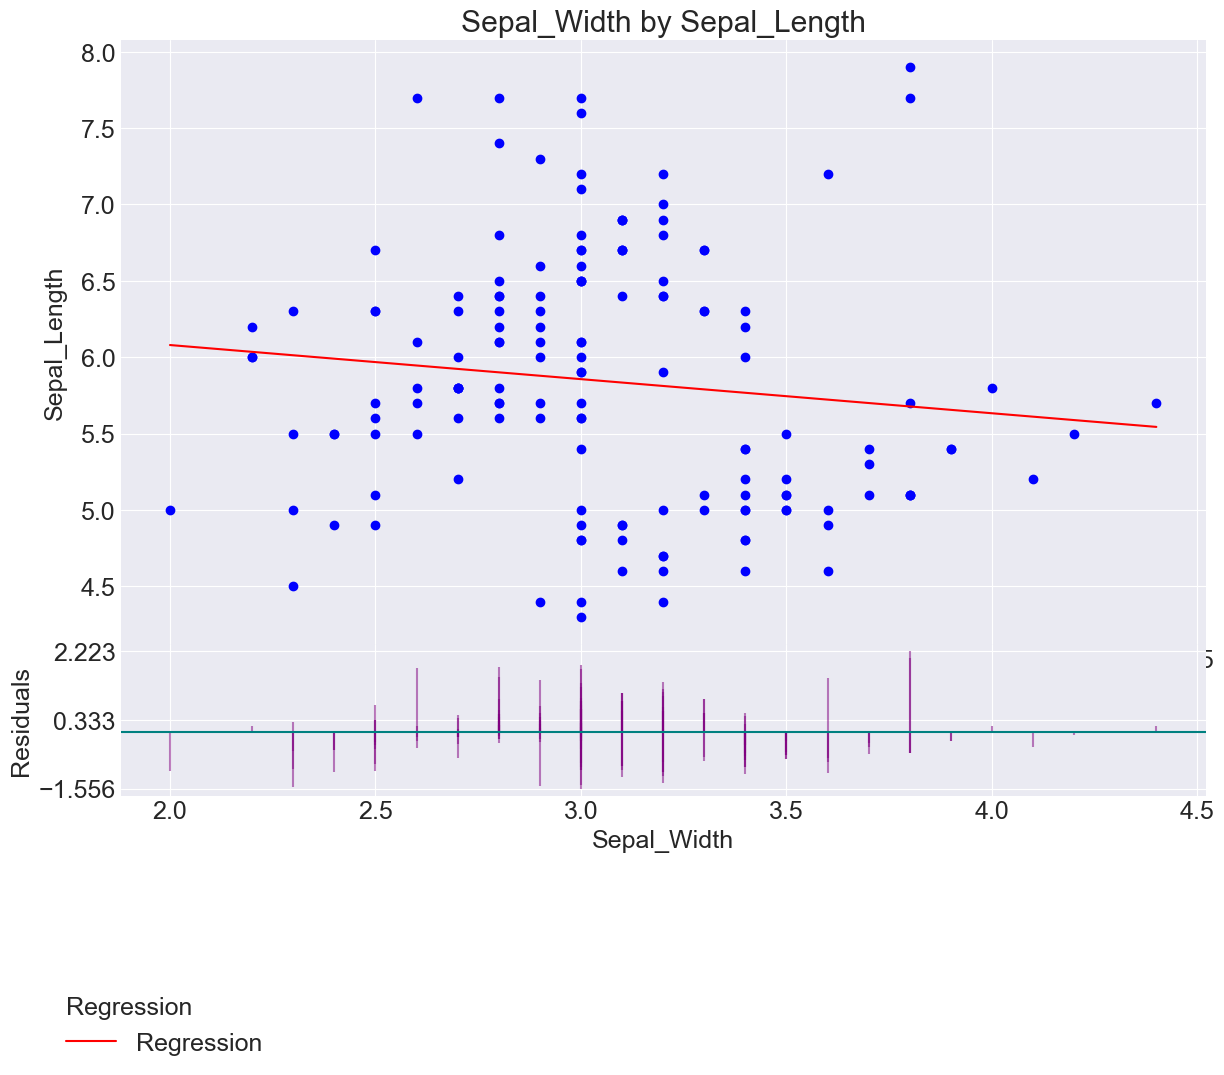

In [46]:
import dataClass as dataClass
import linear_regression
# Create scatter plot of sepal_length vs. sepal_width
dataObj = dataClass.Data(dFrame = iris_data)

lr = linear_regression.LinearRegression(dataObj)
lr.linear_regression(['sepalWidth'], 'sepalLength')

lr.scatter('sepalWidth', 'sepalLength', title='Sepal_Width by Sepal_Length', operand=lr.lin_opp, R2 = lr.R2, residuals_on = True)


In the cell below, apply PCA on the Iris dataset **without any normalization** and create a 2x2 grid of scatter plots showing the data reconstruction of the 1st two data variables (`sepal_length`, `sepal_width` — *these are what your axis labels should be*) when keeping the top 1, 2, 3, or 4 (all) principal components.

If everything goes well, if you keep all 4 PCs you should get the original dataset back (it should match your `sepal_length`, `sepal_width` plot created one cell above — including the data range and center).

sepalLengthIndex: 0
sepalWidthIndex: 1


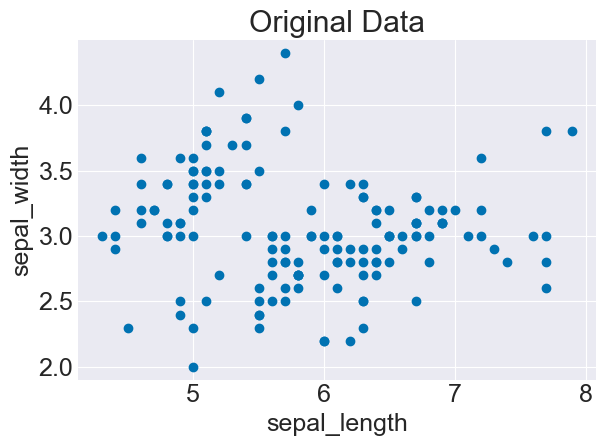

['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']


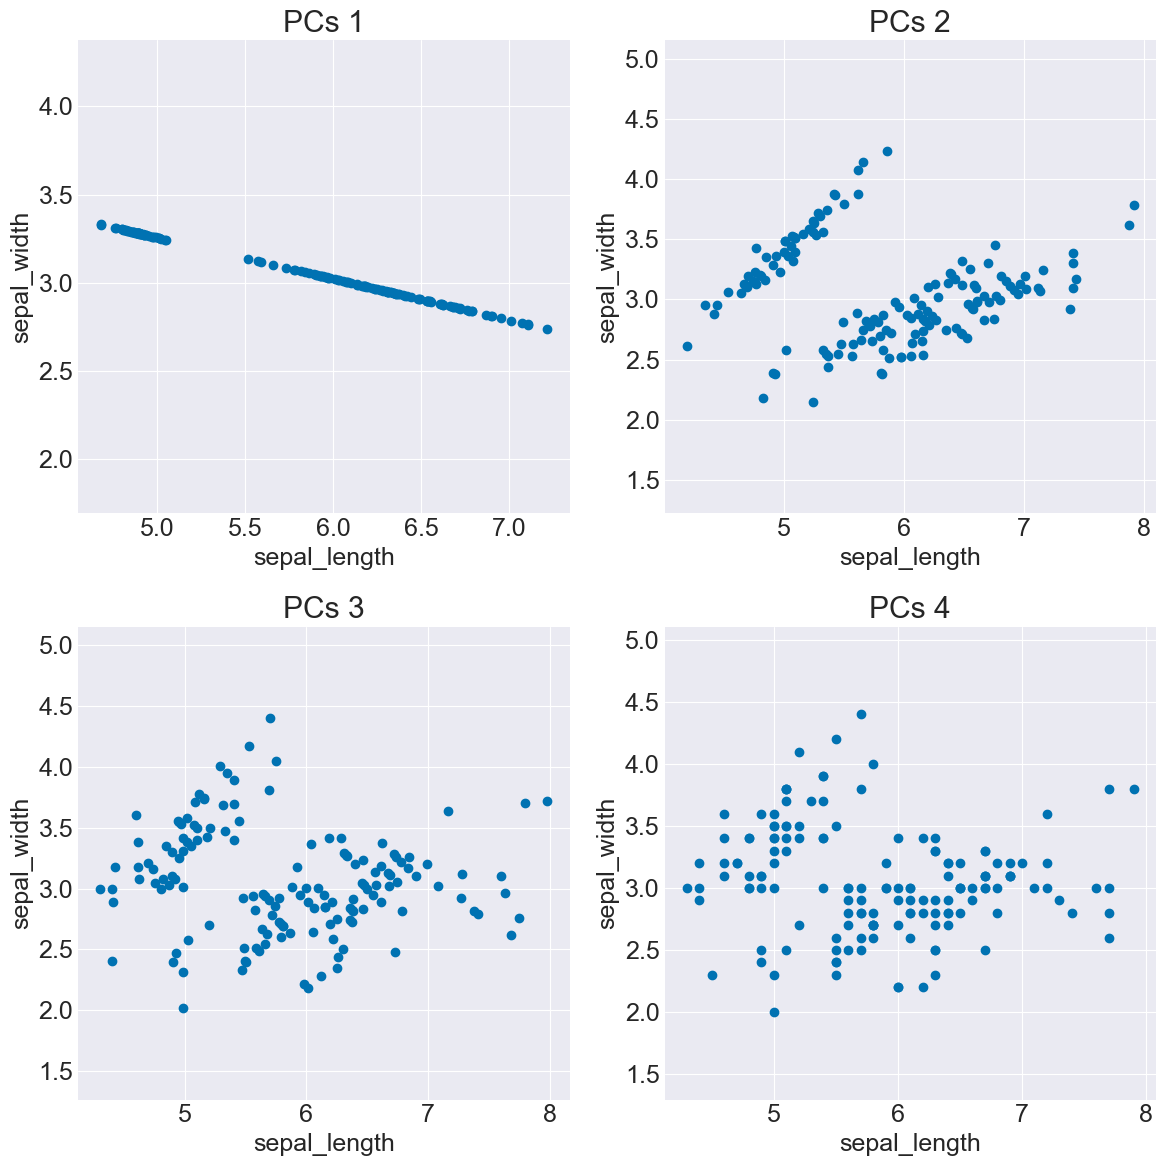

In [47]:
# Apply PCA to Iris dataset without normalization
sepalLengthIndex = iris_data.columns.get_loc('sepalLength')
sepalWidthIndex = iris_data.columns.get_loc('sepalWidth')
print('sepalLengthIndex:', sepalLengthIndex)
print('sepalWidthIndex:', sepalWidthIndex)

plt.plot(iris_data['sepalLength'], iris_data['sepalWidth'], 'o')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('Original Data')
plt.axis('equal')
plt.tight_layout()
plt.show()


iris_pca = pca.PCA(iris_data)
iris_pca.fit(list(iris_data.columns), normalize_dataset=False)

# Create a 2x2 grid of scatter plots
fig2, axs = plt.subplots(2, 2, figsize=(12, 12))

# PCs 1
pcs_to_keep = 1
iris_proj1 = iris_pca.pca_then_project_back(pcs_to_keep)
axs[0, 0].plot(iris_proj1[:, sepalLengthIndex], iris_proj1[:, sepalWidthIndex], 'o')
axs[0, 0].set_xlabel('sepal_length')
axs[0, 0].set_ylabel('sepal_width')
axs[0, 0].set_title('PCs 1')
axs[0, 0].axis('equal')

# PCs 2
pcs_to_keep = 2
iris_proj2 = iris_pca.pca_then_project_back(pcs_to_keep)
axs[0, 1].plot(iris_proj2[:, sepalLengthIndex], iris_proj2[:, sepalWidthIndex], 'o')
axs[0, 1].set_xlabel('sepal_length')
axs[0, 1].set_ylabel('sepal_width')
axs[0, 1].set_title('PCs 2')
axs[0, 1].axis('equal')

# PCs 3
pcs_to_keep = 3
iris_proj3 = iris_pca.pca_then_project_back(pcs_to_keep)
axs[1, 0].plot(iris_proj3[:, sepalLengthIndex], iris_proj3[:, sepalWidthIndex], 'o')
axs[1, 0].set_xlabel('sepal_length')
axs[1, 0].set_ylabel('sepal_width')
axs[1, 0].set_title('PCs 3')
axs[1, 0].axis('equal')

# PCs 4
pcs_to_keep = 4
iris_proj4 = iris_pca.pca_then_project_back(pcs_to_keep)
axs[1, 1].plot(iris_proj4[:, sepalLengthIndex], iris_proj4[:, sepalWidthIndex], 'o')
axs[1, 1].set_xlabel('sepal_length')
axs[1, 1].set_ylabel('sepal_width')
axs[1, 1].set_title('PCs 4')
axs[1, 1].axis('equal')

plt.tight_layout()
plt.show()


### 3f. Questions

**Question 9:** How well does each of the re-projections preserve properties of the original data? Briefly interpret what the above 2x2 grid means.

**Answer 9:** The first chart representing just PC1 does not preserve the date well at all just showing the general trend of the data. The second chart representing PC1 and PC2 does a better job of preserving the data, but still does not capture the data well as it compresses it along the axis of the trend line. The third chart representing PC1, PC2, and PC3 does a fairly good to great job of preserving the data, with only minor discrepancies. The fourth chart representing four PCs perfectly preserves the data as it is just the data. This means that the first three PCs capture the majority of the data's variance, and the fourth PC captures the rest of the remaining variance.

### 3g. Implement loading plot

To visualize how the top two principal components relate to original data variables, implement `loading_plot` in `pca.py`.

### 3h. Questions

**Question 10:** Call your `loading_plot` method to generate a loading plot of the Iris dataset. What do the loadings tell us what the first two PCs measure specifically, with respect to the original data variables?

**Question 11:** What specific correlations among original data variables do the loadings help us identity?

**Answer 10:** The loading plot tells us that PC1 most heavily measures petal length and petal width, somewhat measures sepal length and hardly measuring sepal width, while PC2 most heavily measures sepal length and sepal width, while pretty much equally meagerly measuring petal width and length. 

**Answer 11:** The loadings help us identify that sepal length and sepal width are moderately highly correlated, as they are both heavily measured by PC2. Additionally, petal length and petal width are very highly correlated, as they are both heavily measured by PC1 and pretty much have the same (complex) argument. Furthermore, the near orthogonal relationship the petal and sepal measurements demonstrate that they are pretty much unrelated.

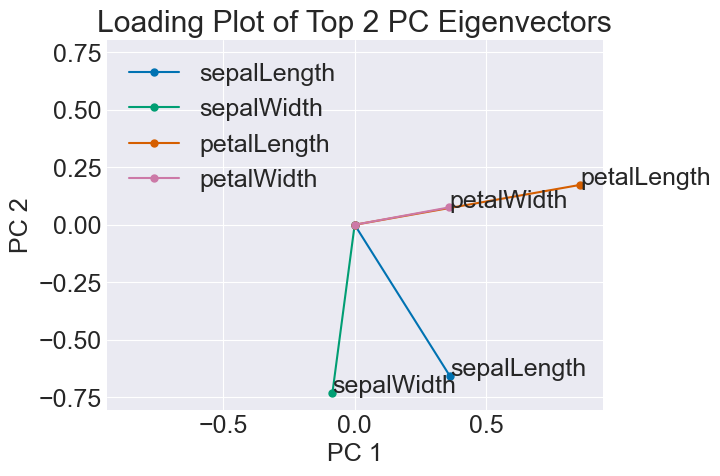

In [48]:
# Loading plot
iris_pca.loading_plot()
plt.show()